### **Mount drive**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd {'/content/drive/MyDrive/Kaggle'}

/content/drive/MyDrive/Kaggle


### **Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import datasets
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

### **Import dataset**

In [ ]:
#folder with the functions defined
from src.dataset import *
from src.plots import *
from src.preprocessing import *

In [ ]:
df_original = load_dataset('weatherAUS.csv')

# **EDA: Exploratory Data Analysis**

### **General info about the dataset**

Dataset dimension: 145460 instances, 23 columns

Number of variables: 23

Type of variables: Categorical(7) and numerical(16)


In [ ]:
#dataset dimension
df_original.shape

(145460, 23)

In [ ]:
#name of variables
df_original.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
#dataset preview
df_original.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In the above preview we can see there are several Nan's in different variables. We will study them later.

In [ ]:
#dataset summary
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
#dataset statistics (numerical)
df_original.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
#dataset statistics (categorical)
df_original.describe(include=['object'])

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-08-16,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


### **Target**

The target variable that it's being explored is RainTomorrow in order to predict wether it's going to rain the next day or not.

Target: ```RainTomorrow``` 
- categorical variable
- unique values: 2 (Yes, No)
- imbalanced (77.58% No, 22.42% Yes)



In [ ]:
#Target categories (number of unique values)
TARGET = 'RainTomorrow'
df_original[TARGET].nunique()

2

In [ ]:
#Number of NaNs in our target
df_original[TARGET].isnull().sum()

3267

We could consider replacing some of these NaNs in order to have more instances to study.

In [ ]:
#% of NaN in our target
df_original[TARGET].isnull().sum()*100/df_original.shape[0]

2.245978275814657

As it only represents 2% of the dataset, we will drop them and make sure the data we study is 100% real. As it's a tiny portion of the original data, it will not affect our predictions

In [ ]:
#copy of the original dataset and we remove the NaN values from the target
df_nonans_target = df_original.copy()
df_nonans_target.dropna(subset=[TARGET], inplace=True)
df_nonans_target[TARGET].isnull().sum()

0

In [ ]:
#type of variable of our target and which different values it contains
df_nonans_target[TARGET].unique()

array(['No', 'Yes'], dtype=object)

We can see our target variable is categorical and takes two different values: Yes or No, depending on if it rains tomorrow or not respectively.

In [ ]:
#Number of instances with the different possible values of our target
df_nonans_target[TARGET].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

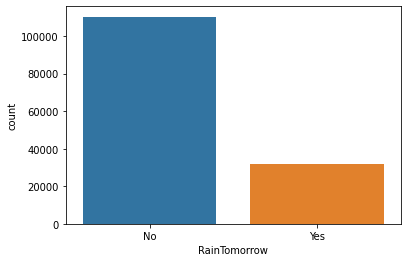

In [ ]:
#bar plot of the target
plt.figure()
sns.countplot(x=TARGET, data=df_nonans_target)
plt.show()

In [ ]:
#percentatge of instances with de the different values of our target
df_nonans_target[TARGET].value_counts()/df_nonans_target.shape[0]

No     0.775819
Yes    0.224181
Name: RainTomorrow, dtype: float64

We observe more than 70% of our target are No, therefore, we can see the dataset is imbalanced. No appears 3.4 times more often than Yes.

### **Other variables**

As we've seen it earlier, the dataset has two types of variables. In this section we are going to analyze them separately.

In [ ]:
#number of variables
len(df_nonans_target.columns) 

23

#### Categorical

In [ ]:
#categorical variables
cat = list(df_nonans_target.select_dtypes(include=['object']).columns)
print("Number of categorical variables:",len(cat))
cat

Number of categorical variables: 7


['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [ ]:
#preview of categorical variables
df_nonans_target[cat].sample(3)

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
110597,2014-09-16,Albany,NaN,SW,SE,No,No
76023,2011-12-10,Portland,SSW,WNW,WSW,No,No
114477,2017-02-03,Witchcliffe,SSE,SSE,SSE,No,No


In [ ]:
#NaNs ins categorical variables
df_nonans_target[cat].isna().sum()

Date                0
Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

We observe there are NaNs ins the different wind directions and in RainToday. RainTomorrow doesn't have because we removed them earlier.

In [ ]:
#number of unique values in categorical variables
for c in cat:
  print(c,":",df_nonans_target[c].nunique(), "labels")

Date : 3436 labels
Location : 49 labels
WindGustDir : 16 labels
WindDir9am : 16 labels
WindDir3pm : 16 labels
RainToday : 2 labels
RainTomorrow : 2 labels


As we see ``` Date``` has too many different labels, we will do preprocessing by decompose it in day, month and year.



In [ ]:
#Modifying Date variable
df_date=df_nonans_target.copy()
df_date['Date'] = pd.to_datetime(df_date['Date'])
df_date['Year'] = df_date['Date'].dt.year
df_date['Month'] = df_date['Date'].dt.month
df_date['Day'] = df_date['Date'].dt.day

In [ ]:
df_date.shape

(142193, 26)

In [ ]:
df_date.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [ ]:
#we remove the 'Date' column
df_date.drop('Date', axis=1, inplace=True)

In [ ]:
df_date.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [ ]:
df_date.shape

(142193, 25)

Now we have to study the numerical variables

#### Numerical

In [ ]:
#type of variables in the dataset
set(df_date.dtypes)

{dtype('int64'), dtype('float64'), dtype('O')}

In [ ]:
#numerical variables
num = list(df_date.select_dtypes(include=['int64','float64']).columns)
print("Number of numerical variables:",len(num))
num

Number of numerical variables: 19


['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

In [ ]:
#preview of numerical variables
df_date[num].sample(3)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
100618,9.1,18.1,1.4,5.4,5.7,59.0,26.0,30.0,60.0,67.0,1014.0,1012.5,7.0,7.0,15.0,14.9,2012,1,10
19396,8.6,19.3,0.0,NaN,NaN,22.0,9.0,2.0,53.0,39.0,1018.1,1014.9,NaN,NaN,14.6,18.9,2012,8,4
51047,0.7,18.8,0.0,NaN,NaN,26.0,7.0,17.0,82.0,47.0,1018.6,1014.2,NaN,NaN,9.9,18.1,2014,9,15


In [ ]:
#NaNs ins categorical variables
df_date[num].isna().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
Year                 0
Month                0
Day                  0
dtype: int64

We have NaNs in all our numerical variables expect for Day, Month and Year.

In [ ]:
#outliers
df_date[num].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000,142193.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2012.758926,6.402544,15.715084
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,2.541256,3.426506,8.798150
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,2007.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,2017.000000,12.000000,31.000000


Looking at the min, max and mean values, we can see which variables may contain outliers. These are: ```RainFall```, ```Evaporation```, ```WindSpeed9am```, ```WindSpeed3pm``` and maybe others.

In [ ]:
#variables to analyze the outliers
temperatures = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm']
winds = ['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']
pressures = ['Pressure9am', 'Pressure3pm']
humidities = ['Humidity9am', 'Humidity3pm']
cloud = ['Cloud9am', 'Cloud3pm']
rest = ['Rainfall', 'Evaporation', 'Sunshine']

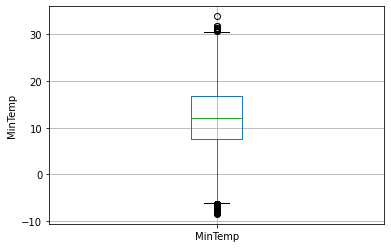

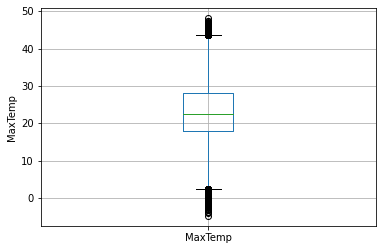

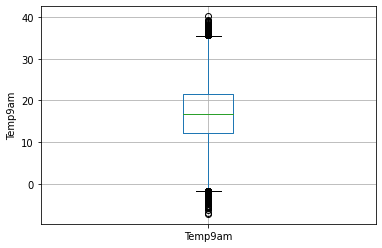

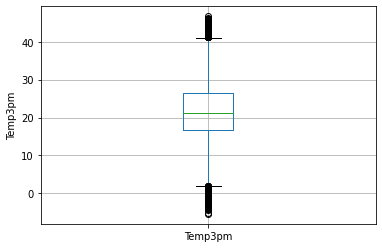

In [ ]:
boxplot(temperatures, df_date)

We can see some outliers in temperatures but it is mostly stable.

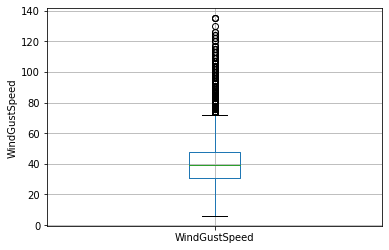

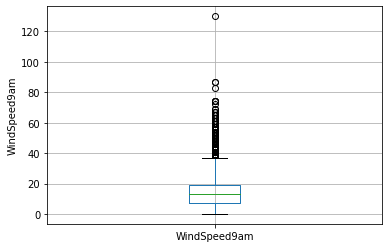

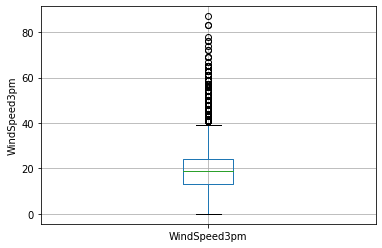

In [ ]:
boxplot(winds, df_date)

We can see in all winds we have several outliers in the upper part.

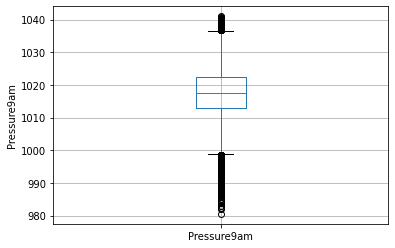

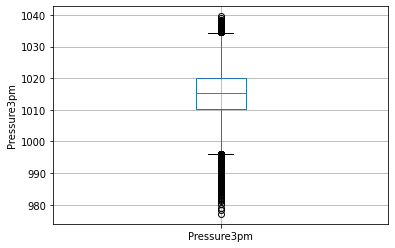

In [ ]:
boxplot(pressures, df_date)

We can see both pressures have values outside the quantile range but they do not arrive to be outliers.

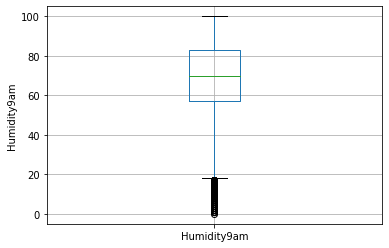

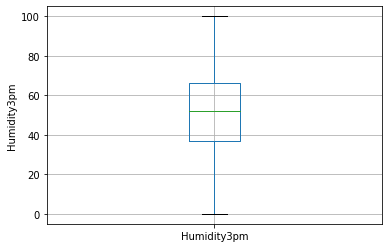

In [ ]:
boxplot(humidities, df_date)

Humidity3pm is perfect. On the other side, Humidity9am has some outliers that will have to be studied later.

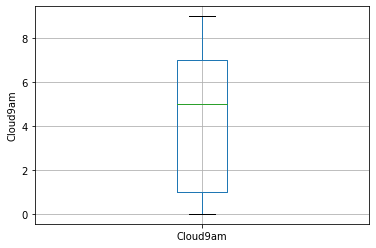

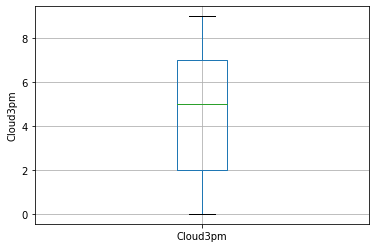

In [ ]:
boxplot(cloud, df_date)

Both clouds don't have outliers.

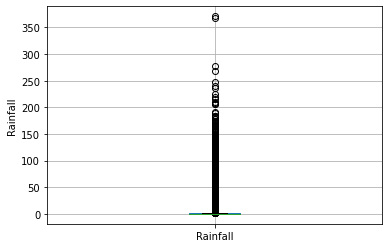

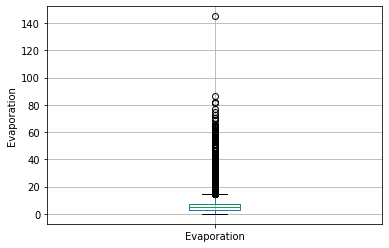

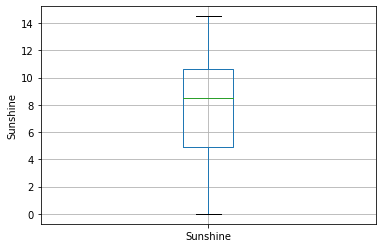

In [ ]:
boxplot(rest, df_date)

Sunshine doesn't have outliers. On the other side, Rainfall and Evaporation are the variables that contain more outliers.

We've seen that the variables with more outliers are Rainfall, Evaporation and the different winds. Let's look at their distribution

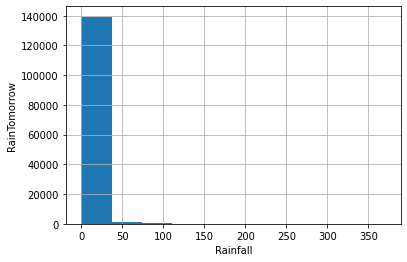

In [ ]:
histogram('Rainfall', TARGET, df_date)

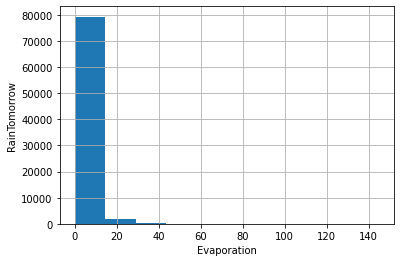

In [ ]:
histogram('Evaporation', TARGET, df_date)

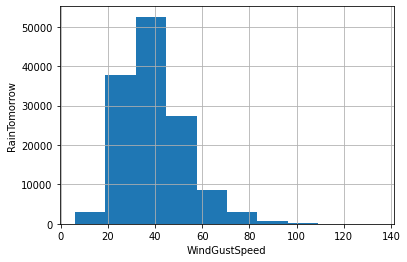

In [ ]:
histogram('WindGustSpeed', TARGET, df_date)

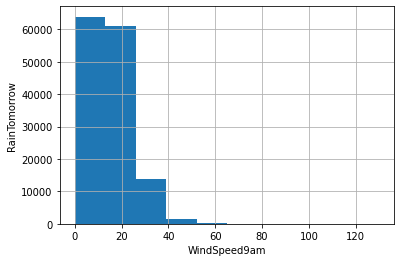

In [ ]:
histogram('WindSpeed9am', TARGET, df_date)

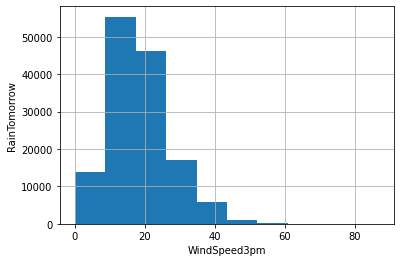

In [ ]:
histogram('WindSpeed3pm', TARGET, df_date)

As we can't see clearly which are outliers, we are going to use the interquantile range.

In [ ]:
#The values that are not in the range returned by the function will be outliers
print('Rainfall')
print(outliers(df_date, 'Rainfall'))

print('Evaporation')
print(outliers(df_date, 'Evaporation'))

for w in winds:
  print(w)
  print(outliers(df_date, w))

Rainfall
(-2.4000000000000004, 3.2)
Evaporation
(-11.800000000000002, 21.800000000000004)
WindGustSpeed
(-20.0, 99.0)
WindSpeed9am
(-29.0, 55.0)
WindSpeed3pm
(-20.0, 57.0)


## **Multivariate analysis**

Now we will look at the correlations between variables

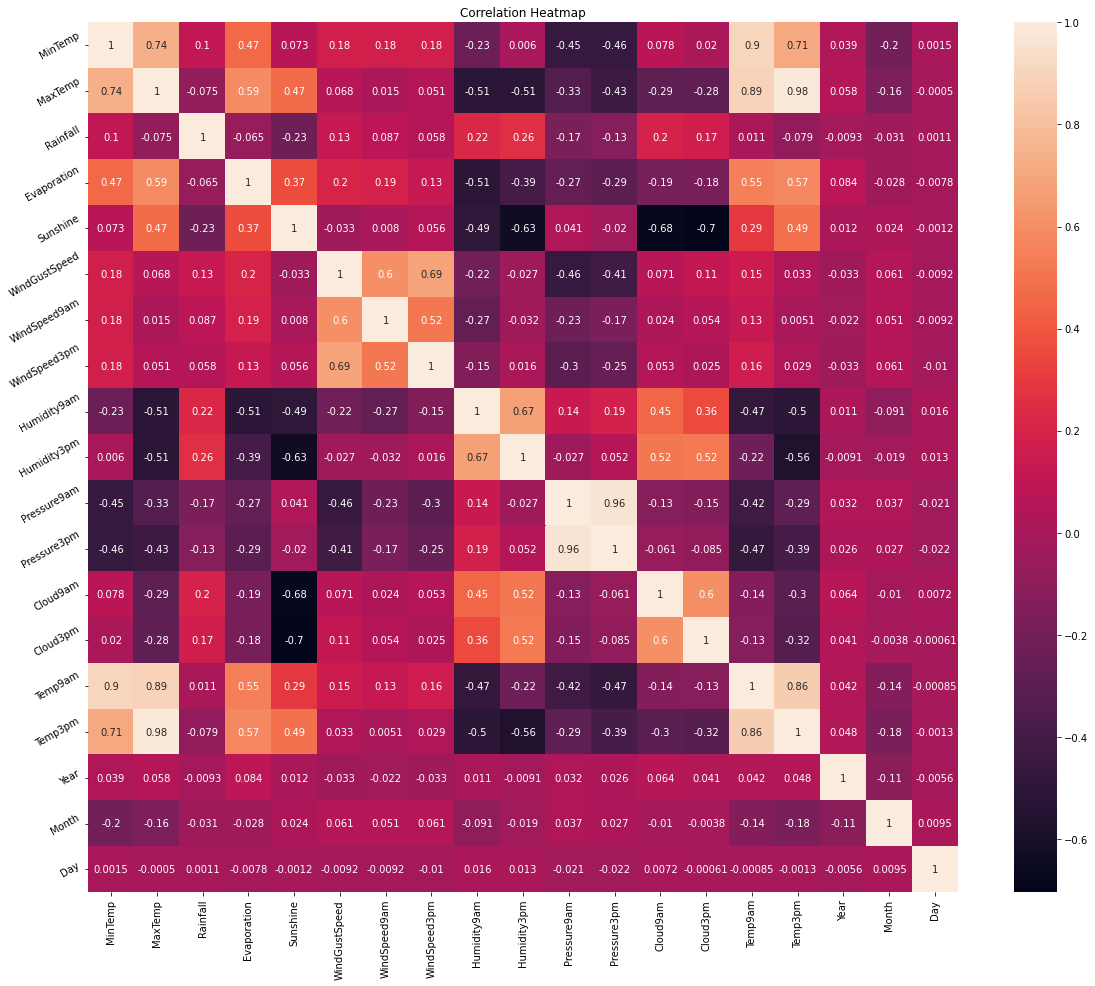

In [ ]:
corr_var = df_date.corr()
plt.figure(figsize=(20,16))
plt.title('Correlation Heatmap')
ax = sns.heatmap(corr_var, square=True, annot=True)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)
plt.show()

In [ ]:
#highest correlations
corr2 = corr_var.abs().unstack().sort_values(kind="quicksort", ascending=False)
corr2[corr2!=1].drop_duplicates()

MaxTemp      Temp3pm        0.984562
Pressure3pm  Pressure9am    0.961348
MinTemp      Temp9am        0.901813
MaxTemp      Temp9am        0.887020
Temp9am      Temp3pm        0.860574
                              ...   
Sunshine     Day            0.001173
Rainfall     Day            0.001134
Day          Temp9am        0.000849
             Cloud3pm       0.000610
MaxTemp      Day            0.000495
Length: 171, dtype: float64

In [ ]:
pip install dython

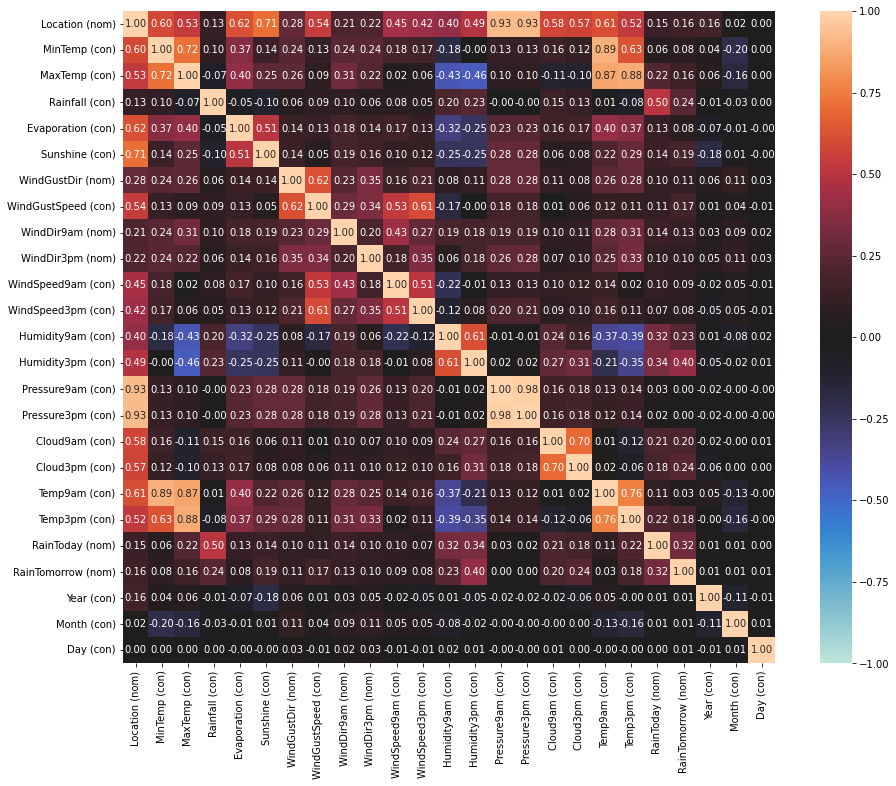

In [ ]:
#correlation between numerical and categorical variables
from dython import nominal
nominal.associations(df_date,figsize=(16,12), mark_columns=True);

As an entire pairplot wouldn't be useful to analyze all the data correctly, we will show only the variables more correlated

In [ ]:
var = ['Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'MaxTemp', 'MinTemp', 'Sunshine', 'WindGustSpeed', 'WindSpeed3pm']
sns.pairplot(df_date[var])

Output hidden; open in https://colab.research.google.com to view.

# **Preprocessing**

Now we will prepare the data in order to analyze it later and create different models.

In [ ]:
df_study = df_date.copy()
#set variable to predict and predictors
y = df_study[TARGET]
X = df_study.drop([TARGET], axis=1)

In [ ]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777, stratify=y)

We have used the stratify variable to predict in order to make our random split have the same portions of No and yes and therefore, we won't modify the probabilities from our original dataset and we may keep similar properties.

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((113754, 24), (28439, 24), (113754,), (28439,))

## **Feature engineering**

In [ ]:
X_train.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
Year               int64
Month              int64
Day                int64
dtype: object

We will separate variables in numerical and categorical as we will study them differently.

In [ ]:
cat = list(X_train.select_dtypes(include=['object']).columns)
num = list(X_train.select_dtypes(include=['float64', 'int64']).columns)

### **NaN in numerical variables**

In [ ]:
X_train[num].isnull().sum()

MinTemp            500
MaxTemp            258
Rainfall          1128
Evaporation      48733
Sunshine         54278
WindGustSpeed     7345
WindSpeed9am      1082
WindSpeed3pm      2091
Humidity9am       1430
Humidity3pm       2868
Pressure9am      11179
Pressure3pm      11140
Cloud9am         43104
Cloud3pm         45786
Temp9am            730
Temp3pm           2150
Year                 0
Month                0
Day                  0
dtype: int64

In [ ]:
for n in num:
  print(n, round(X_train[n].isnull().mean(),4))

MinTemp 0.0044
MaxTemp 0.0023
Rainfall 0.0099
Evaporation 0.4284
Sunshine 0.4772
WindGustSpeed 0.0646
WindSpeed9am 0.0095
WindSpeed3pm 0.0184
Humidity9am 0.0126
Humidity3pm 0.0252
Pressure9am 0.0983
Pressure3pm 0.0979
Cloud9am 0.3789
Cloud3pm 0.4025
Temp9am 0.0064
Temp3pm 0.0189
Year 0.0
Month 0.0
Day 0.0


We see there is no specific reason for these NaN values. Therefore, we will fill them using the median. The mean wouldn't be useful due the outliers we've seen earlier. We will do the same with ```X_test```.

In [ ]:
from sklearn.impute import SimpleImputer
put_median = SimpleImputer(missing_values=np.nan, strategy='median')
X_train[num] = put_median.fit_transform(X_train[num])
X_test[num]  = put_median.fit_transform(X_test[num])
X_train[num].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

### **NaN in categorical variables**

In [ ]:
X_train[cat].isnull().sum()

Location          0
WindGustDir    7392
WindDir9am     7987
WindDir3pm     2987
RainToday      1128
dtype: int64

In [ ]:
X_test[cat].isnull().sum()

Location          0
WindGustDir    1938
WindDir9am     2026
WindDir3pm      791
RainToday       278
dtype: int64

In [ ]:
for c in cat:
  print(c, X_train[c].isnull().mean())

Location 0.0
WindGustDir 0.06498233029168204
WindDir9am 0.07021291558978146
WindDir3pm 0.02625841728642509
RainToday 0.009916134817237196


In [ ]:
cat_with_Nans = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

To fill de NaNs in the categorical variables we will use the mode.

In [ ]:
for df in [X_train, X_test]:
  for v in cat_with_Nans:
    df[v].fillna(X_train[v].mode()[0], inplace=True)

In [ ]:
print('Test')
print(X_test[cat].isnull().sum())
print('\nTrain')
print(X_train[cat].isnull().sum())

Test
Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

Train
Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64


### **Outliers**

In [ ]:
outliers(df_study, 'Rainfall')[0]

-2.4000000000000004

In [ ]:
for v in X_train.select_dtypes(include=['float64']).columns: 
  l, u = outliers(df_study, v)
  for df in [X_train, X_test]:
    df[v] = np.where(df[v] > u, u, df[v])
    df[v] = np.where(df[v] < l, l, df[v])

In [ ]:
X_train[num].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,12.177977,23.217876,0.675206,5.141726,8.041367,39.917014,14.000325,18.652364,68.847082,51.515806,1017.649705,1015.254710,4.650166,4.703659,16.978834,21.669610,2012.762778,6.399784,15.710911
std,6.377183,7.106647,1.183443,2.809198,2.772203,13.108895,8.819978,8.701449,18.948531,20.547022,6.750026,6.690142,2.292028,2.118098,6.466472,6.870803,2.539520,3.425945,8.798075
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,984.400000,981.600000,0.000000,0.000000,-7.200000,-5.400000,2007.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,3.200000,21.800000,14.300000,99.000000,55.000000,57.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,39.400000,46.200000,2017.000000,12.000000,31.000000


In [ ]:
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
143086,Katherine,19.4,32.7,0.0,9.0,8.5,SE,33.0,SE,ESE,22.0,15.0,26.0,24.0,1014.2,1010.1,4.0,3.0,23.5,31.8,No,2015.0,4.0,22.0
130287,Hobart,8.4,14.2,3.2,3.6,1.1,ESE,48.0,SE,SE,7.0,15.0,97.0,86.0,995.3,996.5,8.0,7.0,11.3,12.8,Yes,2009.0,9.0,23.0
29351,Richmond,16.2,26.4,0.2,4.8,8.5,W,28.0,SSW,SE,4.0,2.0,94.0,96.0,1011.8,1010.0,8.0,8.0,20.4,21.7,No,2015.0,3.0,24.0
67893,Melbourne,11.9,15.0,3.2,1.8,0.0,ESE,24.0,ENE,SSE,11.0,11.0,85.0,91.0,1008.2,1005.2,7.0,7.0,13.4,14.3,Yes,2010.0,5.0,25.0
113774,Witchcliffe,9.7,24.2,0.0,4.8,8.5,SSE,50.0,ESE,SE,19.0,28.0,59.0,51.0,1023.9,1021.4,5.0,5.0,18.2,21.5,No,2015.0,3.0,3.0


## **Encoding categorical variables**

In [ ]:
#we use the funtion get_dummies to create binary variables. Each label will have
#its own binary column
X_train = pd.get_dummies(X_train, columns=cat, drop_first=True)
X_test  = pd.get_dummies(X_test,  columns=cat, drop_first=True)

Now we have to do the same thing with our target. We will transform the predictions Yes and No to 1 and 0 respectively.

In [ ]:
encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

In [ ]:
y_train

array([0, 1, 1, ..., 0, 0, 1])

# **Save datasets created**

In [ ]:
import os
import pickle

In [ ]:
if not os.path.isdir('Datasets'):
  os.mkdir('Datasets')

In [ ]:
with open('Datasets/df_nonans_target.pickle', 'wb') as file:
  pickle.dump(df_nonans_target, file)

In [ ]:
with open('Datasets/df_date.pickle', 'wb') as file:
  pickle.dump(df_date, file)

In [ ]:
dict_prepared = {"X_train": X_train, "X_test": X_test,
                "y_train": y_train, "y_test": y_test}

In [ ]:
with open('Datasets/data_encoded.pickle', 'wb') as file:
  pickle.dump(dict_prepared, file)